# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aula 1 - Conhecendo os dados

In [2]:
MVL_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv'
ratings_df = pd.read_csv(MVL_PATH)

In [3]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [4]:
ratings_df.shape
#Número de linhas, número de colunas

(100836, 4)

In [5]:
ratings_df.columns = ['userId', 'movieId', 'ratingValue', 'timeStamp']
ratings_df.head(3)

,userId,movieId,ratingValue,timeStamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [6]:
ratings_series = ratings_df['ratingValue']
ratings_series.head(3)

0    4.0
1    4.0
2    4.0
Name: ratingValue, dtype: float64

In [7]:
ratings_df.describe()

,userId,movieId,ratingValue,timeStamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
ratings_series.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
#Conta quantas vezes um valor único foi registrado
ratings_series.value_counts() 

ratingValue
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [10]:
ratings_mvl_mean = ratings_series.mean()
print(f'Média de notas (geral): {round(ratings_mvl_mean, 3)}')

Média de notas (geral): 3.502


<Axes: ylabel='Frequency'>

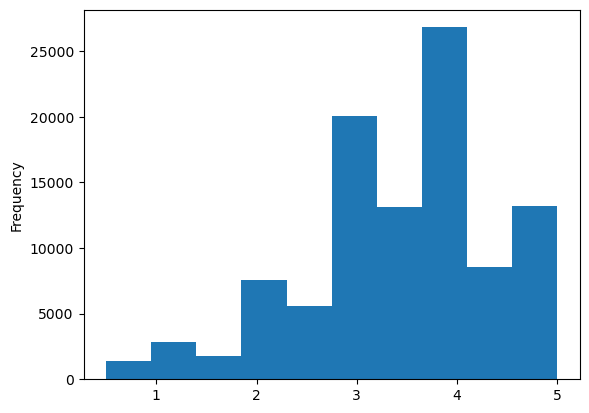

In [11]:
#histograma -> frequência (contagem de valores únicos)
ratings_series.plot(kind='hist')

In [12]:
ratings_mvl_median = ratings_series.median()
print(f'Mediana de notas (geral): {round(ratings_mvl_median, 3)}')

Mediana de notas (geral): 3.5


In [13]:
ratings_series.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: ratingValue, dtype: float64

<Axes: ylabel='ratingValue'>

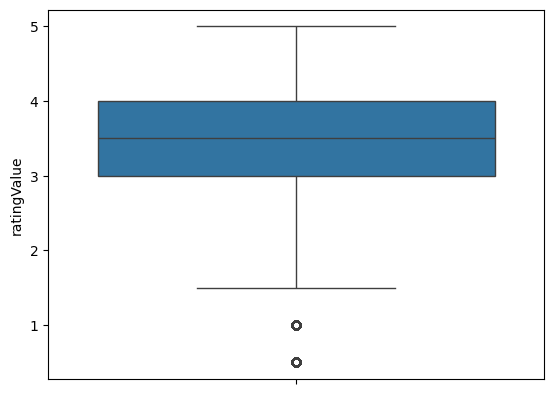

In [14]:
#boxplot -> distribuição por quartis e outliers
sns.boxplot(ratings_series)

## Dataframes

In [15]:
# Criando um DataFrame simples
#Keys como nome das colunas e values(lista) como valores das linhas
#Estrutura tabular de linhas e colunas
dados = {
    'Nome': ['Mirla', 'Ana', 'Daniel'],
   'Idade': [25, 30, 35],
    'Salario': [5000, 6000, 8000]
}
df = pd.DataFrame(dados)
df

,Nome,Idade,Salario
0,Mirla,25,5000
1,Ana,30,6000
2,Daniel,35,8000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     3 non-null      object
 1   Idade    3 non-null      int64 
 2   Salario  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [17]:
df['Salario'].mean()

6333.333333333333

In [18]:
#Series -> sequencia de valoes indexados ordenados
ages = pd.Series([45, 30, 45, 40, 25])
ages

0    45
1    30
2    45
3    40
4    25
dtype: int64

In [19]:
ages.index

RangeIndex(start=0, stop=5, step=1)

In [20]:
ages.sort_values()

4    25
1    30
3    40
0    45
2    45
dtype: int64

# Aula 2 - Analisando os dados

In [21]:
MOVIES_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv'
movies_df = pd.read_csv(MOVIES_PATH)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
ratings_df.head()

,userId,movieId,ratingValue,timeStamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
#Query ->  busca de dados em uma base
ratings_df.query("movieId == 1")['ratingValue'].mean()

3.9209302325581397

In [24]:
ratings_df.query("movieId == 2")['ratingValue'].mean()

3.4318181818181817

In [25]:
#Cria um "grupo" para valores únicos de id de filme
#Como um dict onde um id é a chave e os dados referentes são os valores
ratings_gbmovie_df = ratings_df.groupby('movieId')
ratings_by_movies_series = ratings_gbmovie_df['ratingValue'].mean()
ratings_by_movies_series.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: ratingValue, dtype: float64

<Axes: ylabel='Frequency'>

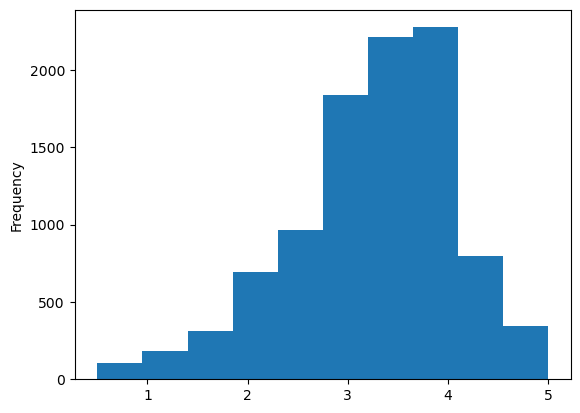

In [26]:
ratings_by_movies_series.plot(kind='hist')

<Axes: ylabel='ratingValue'>

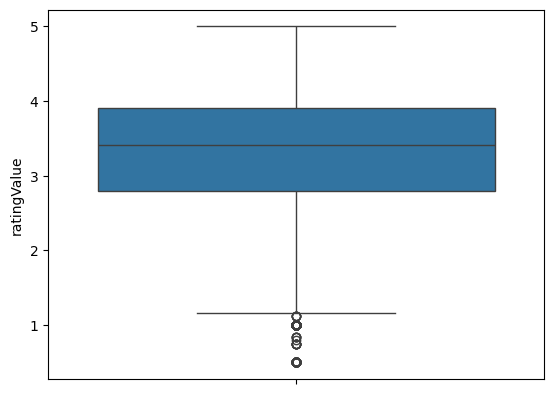

In [27]:
sns.boxplot(ratings_by_movies_series)

In [28]:
ratings_by_movies_series.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: ratingValue, dtype: float64

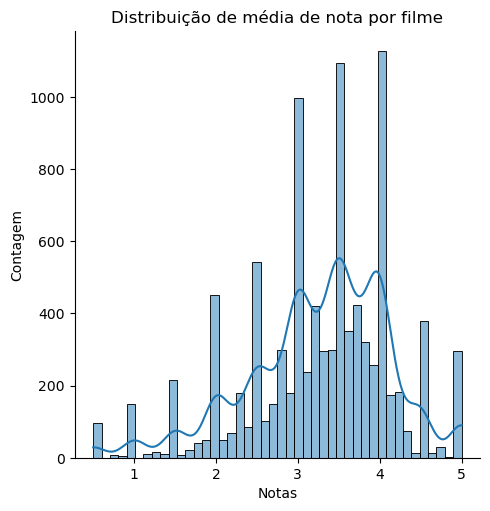

In [29]:
#distribuição das médias de notas por filme
#kde -> curva de distribuição
#O seaborn implementa o matplotlib, é possível alterar o gráfico com plt
sns.displot(ratings_by_movies_series, kde=True) #cria novo gráfico
plt.title('Distribuição de média de nota por filme') #altera gráfico atual
plt.xlabel('Notas') #altera o titulo de x
plt.ylabel('Contagem') # '' y
plt.show() #exibe

## pd.DataFrame.query()

In [30]:
sales_df = pd.read_csv('./serenatto_2sem_2023.csv')
sales_df.query("produto == 'Tiramisù'").head()

,id,data,produto,valor,metodo_pagamento
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
15,2735,2023-07-06,Tiramisù,10.0,Cartão de Crédito
30,2750,2023-07-07,Tiramisù,10.0,Cartão de Débito
31,2751,2023-07-07,Tiramisù,10.0,Cartão de Débito


In [31]:
sales_df.query(
    "valor > 10 and metodo_pagamento != 'Dinheiro'"
).head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
5,2725,2023-07-03,Salada Niçoise,11.0,PIX
7,2727,2023-07-04,Lasanha,11.5,PIX
8,2728,2023-07-04,Gnocchi,10.5,PIX
18,2738,2023-07-06,Salada Niçoise,11.0,Cartão de Débito


In [32]:
products_target = ['Café au lait', 'Espresso', 'Cappuccino']
#O operador @ permite utilizar uma variável externa a query - do python
#usada em consultas dinâmicas
sales_df.query(
    "produto in @products_target and metodo_pagamento == 'PIX'"
).head()

,id,data,produto,valor,metodo_pagamento
9,2729,2023-07-04,Espresso,2.5,PIX
42,2762,2023-07-10,Café au lait,4.0,PIX
64,2784,2023-07-14,Espresso,2.5,PIX
76,2796,2023-07-16,Café au lait,4.0,PIX
77,2797,2023-07-16,Café au lait,4.0,PIX


# Aula 3 - Entendendo os tipos de variáveis

In [33]:
TMDB_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv'
tmdb_df = pd.read_csv(TMDB_PATH)
tmdb_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [34]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [35]:
num_features = [
                'budget', 'popularity', 'revenue', 
                'runtime', 'vote_average', 'vote_count'
]
tmdb_df[num_features].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


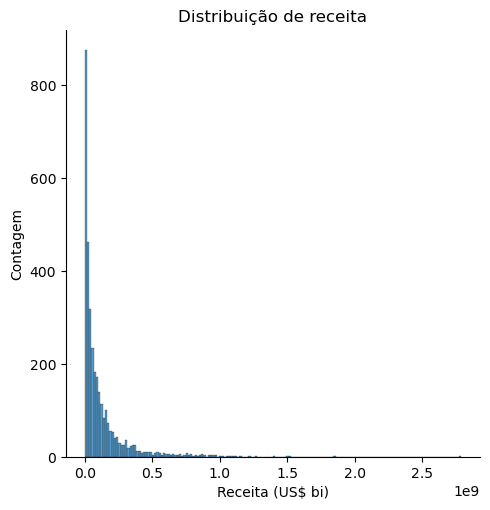

In [36]:
revenue = tmdb_df.query("revenue > 0")['revenue']
sns.displot(revenue)
plt.title('Distribuição de receita')
plt.xlabel('Receita (US$ bi)')
plt.ylabel('Contagem')
plt.show()

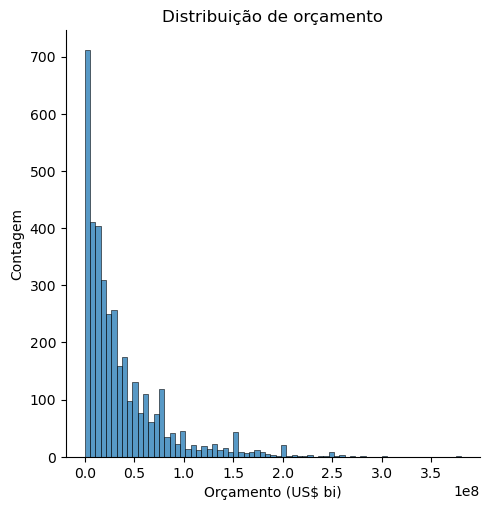

In [37]:
budget = tmdb_df.query("budget > 0")['budget']
sns.displot(budget)
plt.title('Distribuição de orçamento')
plt.xlabel('Orçamento (US$ bi)')
plt.ylabel('Contagem')
plt.show()

In [38]:
original_language = tmdb_df['original_language']
original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [39]:
original_language.value_counts().head()

original_language
en    4505
fr      70
es      32
zh      27
de      27
Name: count, dtype: int64

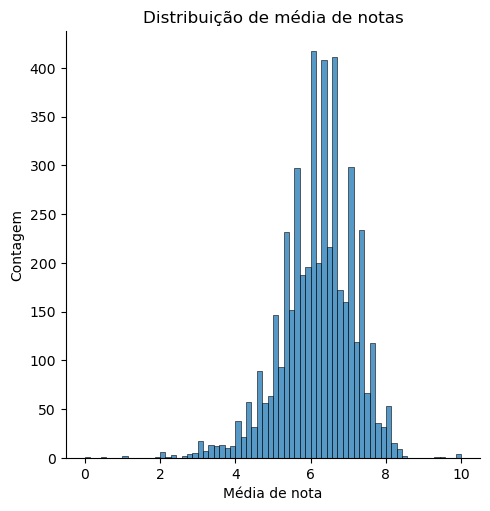

In [40]:
votes_average = tmdb_df.query('vote_count > 0')['vote_average']
sns.displot(votes_average)
plt.title('Distribuição de média de notas')
plt.xlabel('Média de nota')
plt.ylabel('Contagem')
plt.show()

# Aula 4

In [41]:
tmdb_df['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [42]:
tmdb_df['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [43]:
langs_df = tmdb_df['original_language']\
    .value_counts()\
    .to_frame()\
    .reset_index()
langs_df.columns = ['original_lang', 'total']
langs_df.head()

,original_lang,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_lang', ylabel='total'>

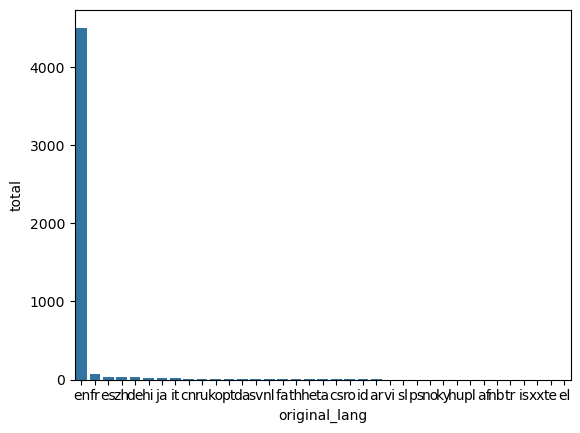

In [44]:
sns.barplot(data=langs_df, x='original_lang', y='total')

<Axes: xlabel='original_language', ylabel='count'>

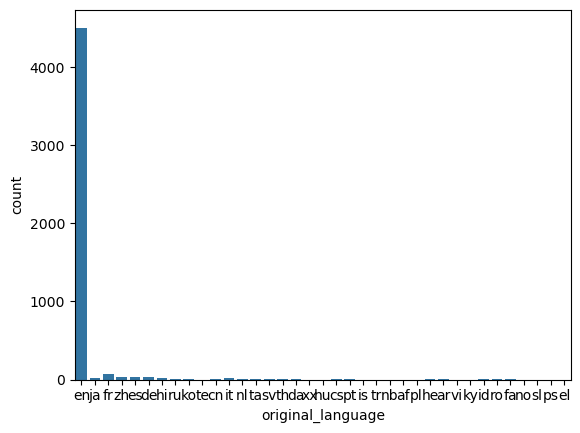

In [45]:
#Fast barplot with Seaborn -> DF and column name
sns.countplot(data=tmdb_df, x='original_language')

In [46]:
en_movies_df = langs_df.query("original_lang == 'en'")
total_en_movies = en_movies_df['total'].values[0]
not_en_movies_df = langs_df.query("original_lang != 'en'")
total_not_en_movies = not_en_movies_df['total'].sum()

In [47]:
data = {
    'language': ['english', 'other'],
    'total': [total_en_movies, total_not_en_movies]
}
langs_comp_df = pd.DataFrame(data)
langs_comp_df

,language,total
0,english,4505
1,other,298


<Axes: xlabel='language', ylabel='total'>

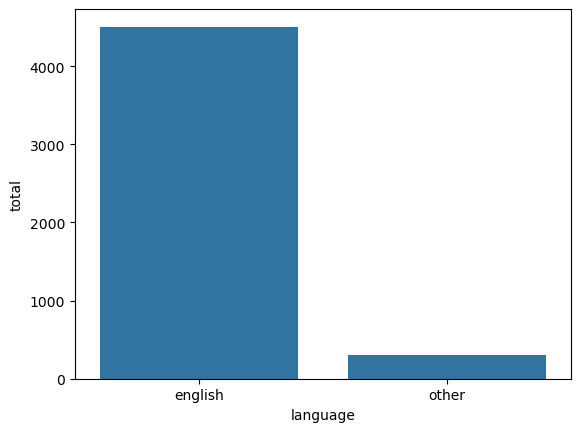

In [48]:
sns.barplot(data=langs_comp_df, x='language', y='total')

<Axes: ylabel='total'>

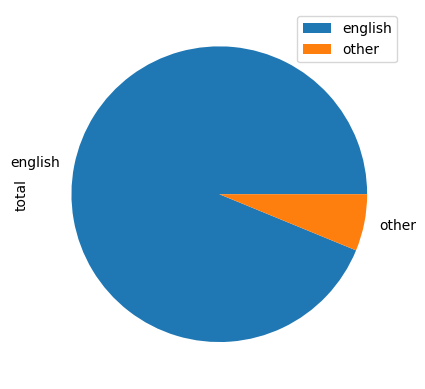

In [49]:
langs_comp_df.plot(kind='pie', labels=langs_comp_df['language'], y='total')

<Axes: xlabel='original_language', ylabel='count'>

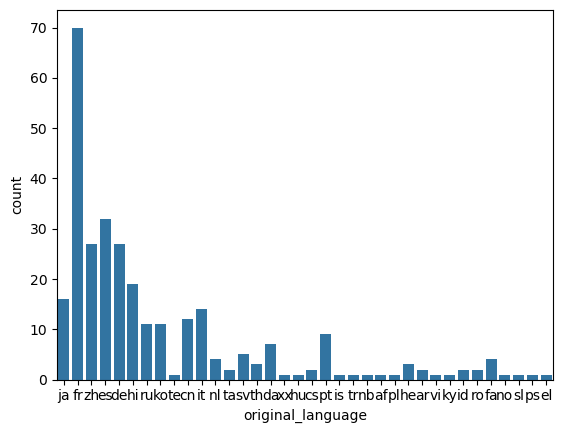

In [52]:
sns.countplot(
    data=tmdb_df.query("original_language!='en'"),
    x='original_language'
)